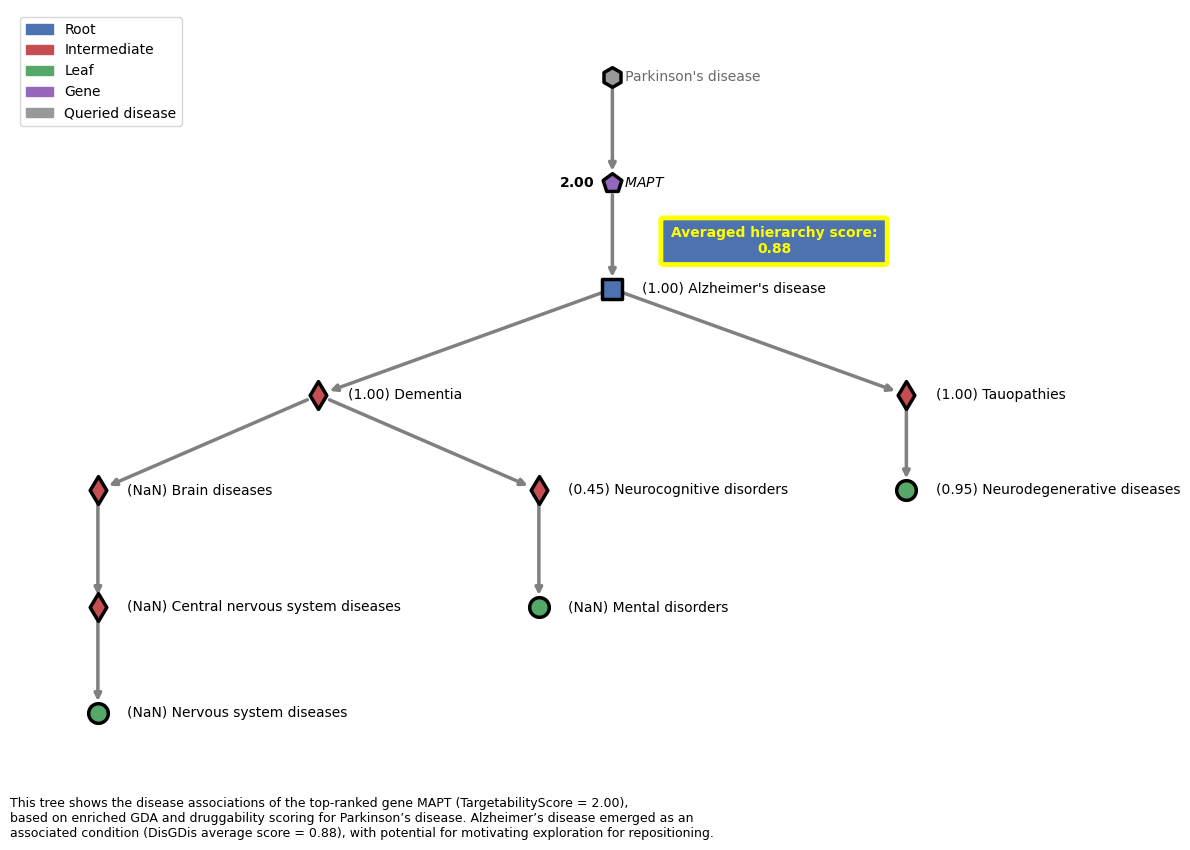

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

# Define scores
scores = {
    "Alzheimer's disease": 1.00,
    "Dementia": 1.00,
    "Tauopathies": 1.00,
    "Neurodegenerative diseases": 0.95,
    "Neurocognitive disorders": 0.45,
    "Brain diseases": float('nan'),
    "Central nervous system diseases": float('nan'),
    "Nervous system diseases": float('nan'),
    "Mental disorders": float('nan'),
    "MAPT": 2.00
}

# Define edges
edges = [
    ("   Parkinson's disease", "MAPT"),
    ("MAPT", "Alzheimer's disease"),
    ("Alzheimer's disease", "Dementia"),
    ("Alzheimer's disease", "Tauopathies"),
    ("Tauopathies", "Neurodegenerative diseases"),
    ("Dementia", "Brain diseases"),
    ("Dementia", "Neurocognitive disorders"),
    ("Brain diseases", "Central nervous system diseases"),
    ("Central nervous system diseases", "Nervous system diseases"),
    ("Neurocognitive disorders", "Mental disorders")
]

# Layout
pos = {
    "   Parkinson's disease": (0, 6.5),
    "MAPT": (0, 5.5),
    "Alzheimer's disease": (0, 4.5),
    "Dementia": (-2, 3.5),
    "Tauopathies": (2, 3.5),
    "Brain diseases": (-3.5, 2.6),
    "Neurocognitive disorders": (-0.5, 2.6),
    "Neurodegenerative diseases": (2, 2.6),
    "Central nervous system diseases": (-3.5, 1.5),
    "Mental disorders": (-0.5, 1.5),
    "Nervous system diseases": (-3.5, 0.5)
}

# Build graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Node classification
leaves = [n for n in G.nodes if G.out_degree(n) == 0]
roots = [n for n in G.nodes if G.in_degree(n) == 0]
intermediates = [n for n in G.nodes if n not in roots and n not in leaves]

# Style config
colors = {
    'root': '#4C72B0',
    'intermediate': '#C44E52',
    'leaf': '#55A868',
    'gene': '#9467bd',
    'query': '#999999'
}
shapes = {
    'root': 's',
    'intermediate': 'd',
    'leaf': 'o',
    'gene': 'p',
    'query': 'h'
}
node_style = {}
for node in G.nodes:
    if node == "MAPT":
        node_style[node] = ('gene', colors['gene'], shapes['gene'])
    elif node == "   Parkinson's disease":
        node_style[node] = ('query', colors['query'], shapes['query'])
    elif node == "Alzheimer's disease":
        node_style[node] = ('root', colors['root'], shapes['root'])
    elif node in leaves:
        node_style[node] = ('leaf', colors['leaf'], shapes['leaf'])
    elif node in roots:
        node_style[node] = ('root', colors['root'], shapes['root'])
    else:
        node_style[node] = ('intermediate', colors['intermediate'], shapes['intermediate'])

# Plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Draw edges
nx.draw_networkx_edges(G, pos, ax=ax, arrows=True, arrowstyle='-|>', edge_color='gray', width=2.5)

# Draw nodes
for role, color, shape in set(node_style.values()):
    selected = [n for n in G.nodes if node_style[n][0] == role]
    nx.draw_networkx_nodes(G, pos, nodelist=selected, node_color=color,
                           node_shape=shape, node_size=200, edgecolors='black', linewidths=2.5)

# Draw labels
for node, (x, y) in pos.items():
    role = node_style[node][0]
    score = scores.get(node)
    score_text = f"({score:.2f})" if isinstance(score, float) and not math.isnan(score) else "(NaN)"
    
    if node == "MAPT":
        label = rf"$\bf{{{score:.2f}}}$       $\it{{MAPT}}$"
        ax.text(x, y, label, va='center', ha='center', fontsize=10, color='black')
    elif node == "   Parkinson's disease":
        ax.text(x, y, node, va='center', ha='left', fontsize=10, color='dimgray')
    else:
        ax.text(x + 0.2, y, f"{score_text} {node}", va='center', ha='left', fontsize=10)

# Average score box
alz_pos = pos["Alzheimer's disease"]
avg_box = mpatches.FancyBboxPatch(
    (alz_pos[0] + 0.35, alz_pos[1] + 0.25),
    width=1.5, height=0.4,
    boxstyle="round,pad=0.02",
    edgecolor='yellow',
    facecolor=colors['root'],
    linewidth=3.5
)
ax.add_patch(avg_box)
ax.text(alz_pos[0] + 1.1, alz_pos[1] + 0.45,
        "Averaged hierarchy score:\n0.88",
        ha='center', va='center',
        fontsize=10, fontweight='bold', color='yellow')

# Legend
legend_handles = [
    mpatches.Patch(color=colors['root'], label='Root'),
    mpatches.Patch(color=colors['intermediate'], label='Intermediate'),
    mpatches.Patch(color=colors['leaf'], label='Leaf'),
    mpatches.Patch(color=colors['gene'], label='Gene'),
    mpatches.Patch(color=colors['query'], label='Queried disease')
]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0, 1))

# Caption
caption = (
    "This tree shows the disease associations of the top-ranked gene MAPT (TargetabilityScore = 2.00),\n"
    "based on enriched GDA and druggability scoring for Parkinson’s disease. Alzheimer’s disease emerged as an \n"
    "associated condition (DisGDis average score = 0.88), with potential for motivating exploration for repositioning."
)
plt.figtext(0.01, -0.05, caption, wrap=True, horizontalalignment='left', fontsize=9)
plt.axis('off')
plt.tight_layout()
plt.savefig("hierarchies/hierarchy_example.png", bbox_inches='tight')
plt.show()